 # Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sna
import matplotlib.pyplot as plt 

# Loading DataSet Data.csv

In [2]:
data=pd.read_csv(r"C:\Users\Vijay\Data.csv")

 # Infomation of Data

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
print(data.shape)

(25, 2)


In [7]:
for n,colu in enumerate(data.columns):
    print(f'Column number {1+n} is {colu}')

Column number 1 is Hours
Column number 2 is Scores


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Correlation between Hours and Scores

In [10]:
corr=data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


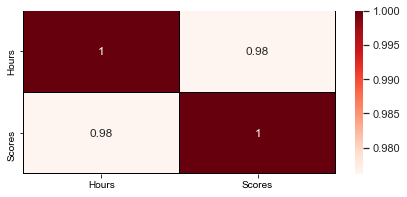

In [11]:
fig, ax = plt.subplots(figsize=(7,3))
sna.set(font_scale=1)
ax = sna.heatmap(corr, cmap = 'Reds',annot = True, linewidths=0.5, linecolor='black')
plt.show()

# Bar Plot Hour Column 

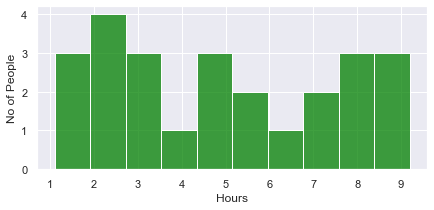

In [12]:
fig,ax= plt.subplots(figsize=(7,3))
sna.set(font_scale=1)
ax = sna.histplot(data['Hours'],bins=10,color=['Green'])
ax.set_xlabel('Hours')
ax.set_ylabel('No of People')
plt.show()

# Bar Plot Score Column 

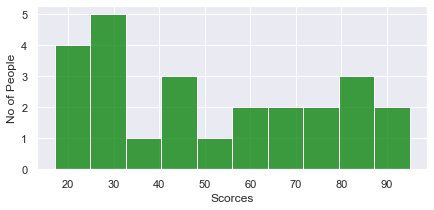

In [13]:
fig,ax= plt.subplots(figsize=(7,3))
sna.set(font_scale=1)
ax = sna.histplot(data['Scores'],bins=10,color=['Green'])
ax.set_xlabel('Scorces')
ax.set_ylabel('No of People')
plt.show()

# Plotting the Hours vs Scores Graph

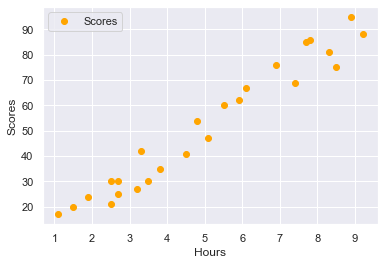

In [14]:
data.plot(x='Hours', y='Scores', style='o',color='Orange')    
plt.xlabel('Hours')  
plt.ylabel('Scores')  
plt.show()

 # Dividing the data into inputs and outputs.

In [15]:
x=data.iloc[:,0:1].values
y=data.iloc[:,-1].values

### Independent Variable

In [16]:
x.reshape(-1,1)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

### Dependent Variable

In [17]:
y.reshape(-1,1)

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

### Spliting the data into training and test sets.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Trianing th Model using LinearRegression() Class

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(x_test)

# Plotting the Best - Fit Line

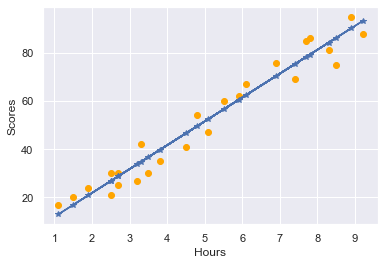

In [23]:
line=lr.coef_*x+lr.intercept_
plt.scatter(x,y,color='Orange')
plt.xlabel('Hours')  
plt.ylabel('Scores')
plt.plot(x,line,marker='*');
plt.show()


# Actual Values vs Predicted Values

In [24]:
df=pd.DataFrame({'Actual Values in the Dataset': y_test, 'Predicted values by the model': y_pred})  
df 

,Actual Values in the Dataset,Predicted values by the model
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Performance of the Model

In [25]:
from sklearn import metrics

In [26]:
accuracy=metrics.r2_score(y_test,y_pred)

In [27]:
print('Accuracy: ',accuracy*100)
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, y_pred)) 

Accuracy:  94.54906892105356
Mean Absolute Error:  4.183859899002975


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [28]:
lr.predict([[9.25]])

array([93.69173249])